In [1]:
import pandas as pd

twitter = pd.read_csv('twitter_cleaned_stemmed-2.csv', index_col=False)
reddit = pd.read_csv('reddit_cleaned_stemmed.csv', index_col=False)

In [2]:
reddit.drop({'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)

In [3]:
twitter.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [4]:
twitter.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [5]:
reddit.dropna(how='any', inplace=True)
twitter.dropna(how='any', inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reddit['class'] = le.fit_transform(reddit['class'])

In [9]:
X_twitter = twitter['text']
y_twitter = twitter['class']

X_reddit = reddit['text']
y_reddit = reddit['class']

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_twitter)
tokenizer.fit_on_texts(X_reddit)
X_twitter = tokenizer.texts_to_sequences(X_twitter)
X_reddit = tokenizer.texts_to_sequences(X_reddit)
X_twitter = sequence.pad_sequences(X_twitter, padding='post', maxlen=300)
X_reddit = sequence.pad_sequences(X_reddit, padding='post', maxlen=300)

In [13]:
from sklearn.model_selection import train_test_split
X_trainreddit, X_testreddit, y_trainreddit, y_testreddit80 = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)
X_traintwitter, X_testtwitter, y_traintwitter, y_testtwitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

In [16]:
from imblearn.combine import SMOTEENN
sampler = SMOTEENN(sampling_strategy = 'all',random_state = 123, n_jobs = -1)
X_traintwitter, y_traintwitter = sampler.fit_resample(X_traintwitter, y_traintwitter)

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout




In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, Dense

max_words = 10000
max_len = 300
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model_GRU.add(GRU(16, return_sequences=True))
model_GRU.add(GRU(8, return_sequences=True))
model_GRU.add(GRU(4, return_sequences=True))
model_GRU.add(GRU(2, return_sequences=False))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
historyreddit80twitter20 = model_GRU.fit(X_trainreddit, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_testtwitter, y_testtwitter))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 458s 158ms/step - accuracy: 0.9130 - loss: 0.2255 - val_accuracy: 0.8362 - val_loss: 0.3845
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 458s 158ms/step - accuracy: 0.9300 - loss: 0.1713 - val_accuracy: 0.8312 - val_loss: 0.4070
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 467s 161ms/step - accuracy: 0.9371 - loss: 0.1488 - val_accuracy: 0.8211 - val_loss: 0.4670
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 454s 157ms/step - accuracy: 0.9431 - loss: 0.1321 - val_accuracy: 0.8275 - val_loss: 0.4871
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 455s 157ms/step - accuracy: 0.9466 - loss: 0.1211 - val_accuracy: 0.8197 - val_loss: 0.5152
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 457s 157ms/step - accuracy: 0.9513 - loss: 0.1076 - val_accuracy: 0.8220 - val_loss: 0.5948
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 458s 158ms/step - accuracy: 0.9563 - loss: 0.0950 - val_accuracy: 0.8068 - val_loss: 0.6959
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 458s 158ms/step - ac

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80twitter20gru = model_GRU.predict(X_testtwitter)
y_pred_binaryreddit80twitter20gru = np.round(y_predreddit80twitter20gru)

precisionreddit80twitter20gru = precision_score(y_testtwitter, y_pred_binaryreddit80twitter20gru)
recallreddit80twitter20gru = recall_score(y_testtwitter, y_pred_binaryreddit80twitter20gru)
f1reddit80twitter20gru = f1_score(y_testtwitter, y_pred_binaryreddit80twitter20gru)
accuracyreddit80twitter20gru = accuracy_score(y_testtwitter, y_pred_binaryreddit80twitter20gru)
print("Precision:", precisionreddit80twitter20gru)
print("Recall:", recallreddit80twitter20gru)
print("F1 Score:", f1reddit80twitter20gru)
print("Accuracy:", accuracyreddit80twitter20gru)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Precision: 0.7511870845204178
Recall: 0.8432835820895522
F1 Score: 0.7945755901557007
Accuracy: 0.8118675252989881


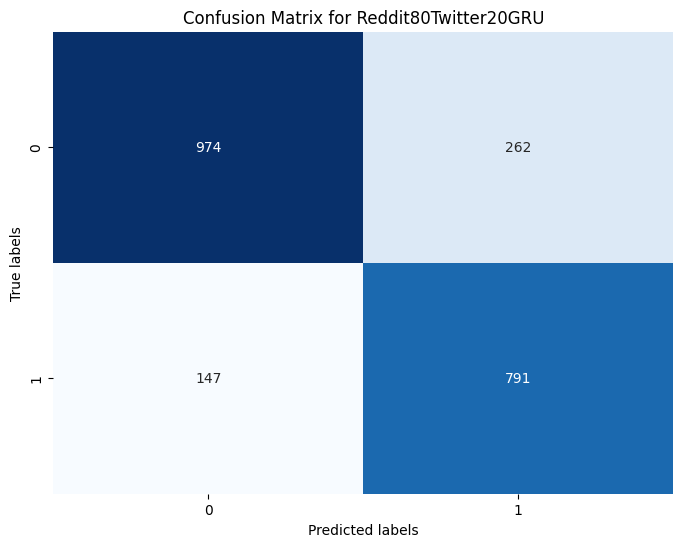

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80twitter20gru = confusion_matrix(y_testtwitter, y_pred_binaryreddit80twitter20gru)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80twitter20gru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Twitter20GRU")
plt.show()

In [36]:
historyreddit80reddit20 = model_GRU.fit(X_trainreddit, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_testreddit, y_testreddit80))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 480s 166ms/step - accuracy: 0.9648 - loss: 0.0724 - val_accuracy: 0.9218 - val_loss: 0.3336
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 482s 166ms/step - accuracy: 0.9662 - loss: 0.0681 - val_accuracy: 0.9267 - val_loss: 0.3298
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 481s 166ms/step - accuracy: 0.9683 - loss: 0.0640 - val_accuracy: 0.9187 - val_loss: 0.3551
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 482s 166ms/step - accuracy: 0.9688 - loss: 0.0618 - val_accuracy: 0.9215 - val_loss: 0.4045
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 481s 166ms/step - accuracy: 0.9693 - loss: 0.0590 - val_accuracy: 0.9237 - val_loss: 0.3914
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 482s 166ms/step - accuracy: 0.9700 - loss: 0.0580 - val_accuracy: 0.9202 - val_loss: 0.3986
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 483s 167ms/step - accuracy: 0.9714 - loss: 0.0549 - val_accuracy: 0.9236 - val_loss: 0.3973
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 483s 166ms/step - ac

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80reddit20gru = model_GRU.predict(X_testreddit)
y_pred_binaryreddit80reddit20gru = np.round(y_predreddit80reddit20gru)

precisionreddit80reddit20gru = precision_score(y_testreddit80, y_pred_binaryreddit80reddit20gru)
recallreddit80reddit20gru = recall_score(y_testreddit80, y_pred_binaryreddit80reddit20gru)
f1reddit80reddit20gru = f1_score(y_testreddit80, y_pred_binaryreddit80reddit20gru)
accuracyreddit80reddit20gru = accuracy_score(y_testreddit80,y_pred_binaryreddit80reddit20gru)
print("Precision:", precisionreddit80reddit20gru)
print("Recall:", recallreddit80reddit20gru)
print("F1 Score:", f1reddit80reddit20gru)
print("Accuracy:", accuracyreddit80reddit20gru)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step
Precision: 0.923251450761377
Recall: 0.9111264209438512
F1 Score: 0.9171488633162126
Accuracy: 0.9175988791895678


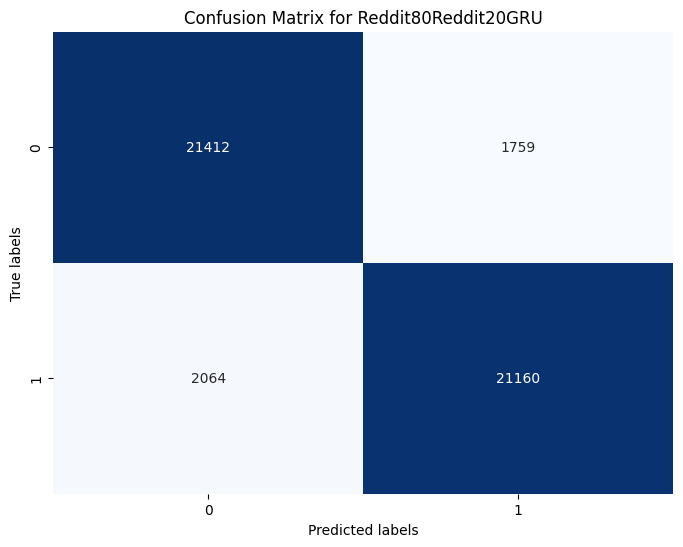

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80reddit20gru = confusion_matrix(y_testreddit80, y_pred_binaryreddit80reddit20gru)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80reddit20gru , annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Reddit20GRU")
plt.show()

In [27]:
historytwitter80reddit20 = model_GRU.fit(X_traintwitter, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_testreddit, y_testreddit80))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 421ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.8824 - val_loss: 0.4601
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 430ms/step - accuracy: 0.9737 - loss: 0.0719 - val_accuracy: 0.8921 - val_loss: 0.4276
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 430ms/step - accuracy: 0.9702 - loss: 0.0751 - val_accuracy: 0.8822 - val_loss: 0.4758
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 425ms/step - accuracy: 0.9764 - loss: 0.0720 - val_accuracy: 0.8855 - val_loss: 0.4725
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 426ms/step - accuracy: 0.9791 - loss: 0.0703 - val_accuracy: 0.8780 - val_loss: 0.5106
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 425ms/step - accuracy: 0.9819 - loss: 0.0577 - val_accuracy: 0.8810 - val_loss: 0.5080
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 424ms/step - accuracy: 0.9804 - loss: 0.0586 - val_accuracy: 0.8763 - val_loss: 0.5396
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 424ms/step - accuracy: 0.9817 - loss: 0.0519 - val_accu

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80reddit20gru = model_GRU.predict(X_testreddit)
y_pred_binarytwitter80reddit20gru = np.round(y_predtwitter80reddit20gru)

precisiontwitter80reddit20gru = precision_score(y_testreddit80, y_pred_binarytwitter80reddit20gru)
recalltwitter80reddit20gru = recall_score(y_testreddit80, y_pred_binarytwitter80reddit20gru)
f1twitter80reddit20gru = f1_score(y_testreddit80, y_pred_binarytwitter80reddit20gru)
accuracytwitter80reddit20gru = accuracy_score(y_testreddit80,y_pred_binarytwitter80reddit20gru)
print("Precision:", precisiontwitter80reddit20gru)
print("Recall:", recalltwitter80reddit20gru)
print("F1 Score:", f1twitter80reddit20gru)
print("Accuracy:", accuracytwitter80reddit20gru)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step
Precision: 0.8463702219482121
Recall: 0.9457888391319325
F1 Score: 0.8933219456645518
Accuracy: 0.8869274706326112


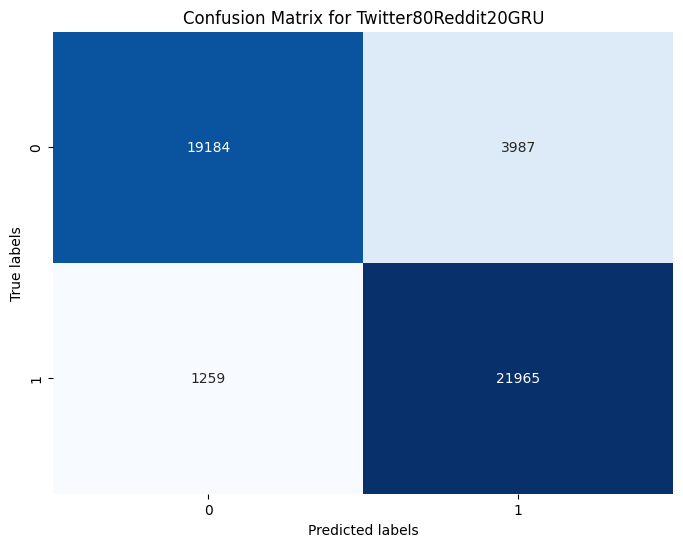

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80reddit20gru = confusion_matrix(y_testreddit80, y_pred_binarytwitter80reddit20gru)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80reddit20gru , annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Reddit20GRU")
plt.show()

In [22]:
historytwitter80twitter80 = model_GRU.fit(X_traintwitter, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_testtwitter, y_testtwitter))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.8952 - loss: 0.2911 - val_accuracy: 0.8878 - val_loss: 0.2981
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9408 - loss: 0.1722 - val_accuracy: 0.8914 - val_loss: 0.3033
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9457 - loss: 0.1507 - val_accuracy: 0.8735 - val_loss: 0.3279
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9546 - loss: 0.1371 - val_accuracy: 0.8914 - val_loss: 0.3238
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9679 - loss: 0.1108 - val_accuracy: 0.8878 - val_loss: 0.3326
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9722 - loss: 0.0923 - val_accuracy: 0.8859 - val_loss: 0.3624
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9699 - loss: 0.0952 - val_accuracy: 0.8767 - val_loss: 0.4048
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9714 - loss: 0.0919 - val_accu

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80twitter80gru = model_GRU.predict(X_testtwitter)
y_pred_binarytwitter80twitter80gru = np.round(y_predtwitter80twitter80gru)

precisiontwitter80twitter80gru = precision_score(y_testtwitter, y_pred_binarytwitter80twitter80gru)
recalltwitter80twitter80gru = recall_score(y_testtwitter, y_pred_binarytwitter80twitter80gru)
f1twitter80twitter80gru = f1_score(y_testtwitter, y_pred_binarytwitter80twitter80gru)
accuracytwitter80twitter80gru = accuracy_score(y_testtwitter, y_pred_binarytwitter80twitter80gru)
print("Precision:", precisiontwitter80twitter80gru)
print("Recall:", recalltwitter80twitter80gru)
print("F1 Score:", f1twitter80twitter80gru )
print("Accuracy:", accuracytwitter80twitter80gru)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
Precision: 0.8740499457111836
Recall: 0.8582089552238806
F1 Score: 0.8660570199031737
Accuracy: 0.8854645814167433


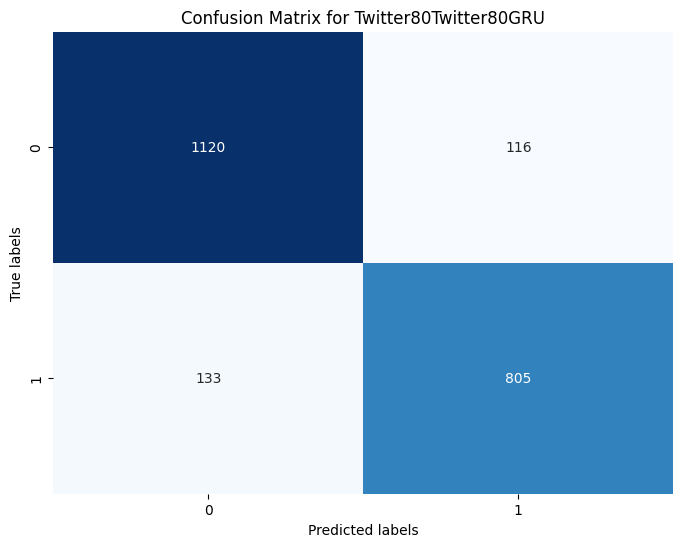

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80twitter80gru = confusion_matrix(y_testtwitter, y_pred_binarytwitter80twitter80gru)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80twitter80gru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Twitter80GRU")
plt.show()

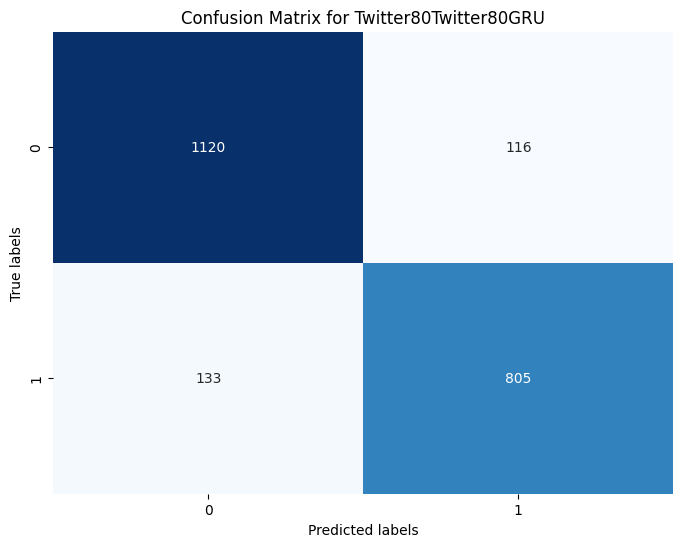

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80twitter80gru = confusion_matrix(y_testtwitter, y_pred_binarytwitter80twitter80gru)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80twitter80gru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Twitter80GRU")
plt.show()
plt.savefig("confusion_matrix_twitter80twitter80gru.png", dpi=300)  # Adjust dpi as needed
plt.show()